In [1]:
!nvidia-smi

Tue Mar 11 11:05:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   46C    P8              6W /   60W |     815MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import cv2
from IPython.display import display, Image


In [3]:
rf = Roboflow(api_key="j4wnJdNQ7hav7iNJ3Enk")
project = rf.workspace("computervision-1hivl").project("violence-detection-2uv6f")
version = project.version(2)
dataset = version.download("yolov11")                       

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Violence-Detection-2 in yolov11:: 100%|██████████| 12524/12524 [00:06<00:00, 1826.25it/s]


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.empty_cache()
print(f"Sử dụng thiết bị: {device}")

Sử dụng thiết bị: cuda


In [6]:
yaml_file = r'C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\data.yaml'  
model = YOLO('yolo11n.pt').to(device) 

results = model.train(data=yaml_file, epochs=100, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.87 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\train\labels... 4397 images, 13 backgrounds, 0 corrupt: 100%|██████████| 4397/4397 [00:10<00:00, 434.68it/s]


train: New cache created: C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 5869, len(boxes) = 9819. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\valid\labels... 1243 images, 10 backgrounds, 0 corrupt: 100%|██████████| 1243/1243 [00:02<00:00, 511.56it/s]

val: New cache created: C:\BaiTap\Python\Violence_Detection\Yolo11\Violence-Detection-2\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 1658, len(boxes) = 2827. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.24G      1.053      1.894       1.22         35        640: 100%|██████████| 275/275 [01:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.69it/s]


                   all       1243       2827        0.5      0.673      0.625      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.25G      1.159      1.488      1.269         64        640: 100%|██████████| 275/275 [00:57<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.81it/s]


                   all       1243       2827      0.596      0.589      0.602       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G      1.171      1.412      1.284         83        640: 100%|██████████| 275/275 [00:56<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]

                   all       1243       2827      0.615      0.648       0.65      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.24G      1.143      1.341       1.27         43        640: 100%|██████████| 275/275 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.94it/s]

                   all       1243       2827      0.583      0.653       0.66      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.23G       1.11      1.268      1.252         69        640: 100%|██████████| 275/275 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.95it/s]

                   all       1243       2827      0.564       0.67      0.654      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.24G      1.069      1.214       1.23         42        640: 100%|██████████| 275/275 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]

                   all       1243       2827      0.711      0.705      0.766      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.24G      1.052      1.186      1.223         60        640: 100%|██████████| 275/275 [00:56<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.92it/s]

                   all       1243       2827      0.721      0.724       0.78      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.24G      1.019      1.145      1.203         58        640: 100%|██████████| 275/275 [00:56<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.84it/s]

                   all       1243       2827      0.729      0.735      0.786      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.23G      1.011      1.115      1.197         59        640: 100%|██████████| 275/275 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.87it/s]

                   all       1243       2827      0.721      0.747      0.799      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.22G     0.9799      1.092      1.183         57        640: 100%|██████████| 275/275 [00:56<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.80it/s]

                   all       1243       2827      0.768      0.748      0.816      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.24G     0.9638      1.073      1.173         68        640: 100%|██████████| 275/275 [00:56<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.86it/s]

                   all       1243       2827      0.767      0.774      0.826      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.24G     0.9437      1.033      1.162         56        640: 100%|██████████| 275/275 [00:56<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.74it/s]

                   all       1243       2827      0.781      0.754      0.827      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.24G       0.96      1.046      1.169         60        640: 100%|██████████| 275/275 [00:54<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]

                   all       1243       2827      0.756      0.756      0.811      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.23G     0.9401      1.013      1.156         57        640: 100%|██████████| 275/275 [00:54<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.05it/s]

                   all       1243       2827      0.742      0.739      0.796       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.24G     0.9357      1.015      1.161         45        640: 100%|██████████| 275/275 [00:54<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.764       0.77       0.83      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.24G      0.928     0.9988      1.155         42        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.811      0.768      0.845      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.23G     0.8965     0.9731       1.14         53        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.801       0.78      0.856      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G     0.9079     0.9719      1.144         40        640: 100%|██████████| 275/275 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.95it/s]

                   all       1243       2827      0.776      0.779      0.833      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G     0.8998     0.9529      1.136         61        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.98it/s]

                   all       1243       2827      0.806      0.789      0.855      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G     0.8943      0.953      1.136         56        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827       0.79      0.797      0.849      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.23G     0.8857     0.9513      1.136         53        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827      0.812      0.796      0.861      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G     0.8727      0.929      1.127         50        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]

                   all       1243       2827      0.813      0.791      0.864      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.24G     0.8776     0.9309      1.128         55        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.07it/s]

                   all       1243       2827      0.821      0.797      0.866        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.23G     0.8667     0.9202       1.13         59        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.818      0.785      0.864        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.24G     0.8632     0.8974      1.119         74        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.792      0.794      0.848      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.23G     0.8539     0.8808      1.117         37        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.03it/s]

                   all       1243       2827      0.802      0.802      0.859      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.23G     0.8546     0.8748      1.116         40        640: 100%|██████████| 275/275 [00:55<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]

                   all       1243       2827      0.808      0.801       0.86      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.24G      0.844     0.8775       1.11         43        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827      0.819      0.793      0.863      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.23G     0.8443     0.8705      1.109         51        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827      0.829      0.811      0.875      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.8452     0.8676      1.113         55        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.94it/s]

                   all       1243       2827       0.83      0.808      0.874      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.23G     0.8395     0.8534       1.11         51        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.846      0.809      0.876       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.23G     0.8311     0.8456      1.103         56        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.96it/s]

                   all       1243       2827       0.83      0.825      0.878      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.24G     0.8307     0.8454      1.103         38        640: 100%|██████████| 275/275 [00:57<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.26it/s]

                   all       1243       2827      0.835      0.811      0.885      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.23G     0.8405     0.8477      1.109         47        640: 100%|██████████| 275/275 [01:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.25it/s]

                   all       1243       2827      0.834      0.812      0.885      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.24G     0.8159     0.8194      1.092         45        640: 100%|██████████| 275/275 [01:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]

                   all       1243       2827      0.842      0.812      0.884      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.23G     0.8156      0.828      1.095         46        640: 100%|██████████| 275/275 [01:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]

                   all       1243       2827      0.835       0.82      0.888      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.23G     0.8124     0.8336      1.096         52        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.20it/s]

                   all       1243       2827      0.842      0.825      0.886      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.23G     0.8067     0.8057       1.09         46        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.28it/s]

                   all       1243       2827      0.831       0.82      0.888      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.24G     0.8014     0.8195      1.089         44        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]

                   all       1243       2827      0.845      0.806      0.877      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.24G     0.8049     0.8078      1.088         59        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.27it/s]

                   all       1243       2827       0.84      0.827       0.89      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.23G     0.8006     0.7938      1.087         50        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]

                   all       1243       2827      0.852      0.827       0.89      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.23G     0.7909     0.7845      1.083         62        640: 100%|██████████| 275/275 [01:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.29it/s]

                   all       1243       2827      0.854        0.8      0.887      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.23G     0.7921     0.7812      1.081         52        640: 100%|██████████| 275/275 [01:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.25it/s]

                   all       1243       2827      0.853       0.83      0.898      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.24G     0.7935     0.7747      1.089         47        640: 100%|██████████| 275/275 [01:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.25it/s]

                   all       1243       2827      0.847      0.831      0.896      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G     0.7816     0.7639      1.076         41        640: 100%|██████████| 275/275 [01:07<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.17it/s]

                   all       1243       2827      0.855      0.844      0.905      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.24G     0.7895     0.7615      1.085         62        640: 100%|██████████| 275/275 [01:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.88it/s]

                   all       1243       2827      0.851      0.828      0.904      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.24G     0.7809     0.7664      1.078         52        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]

                   all       1243       2827      0.855      0.827      0.902      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.23G     0.7766     0.7507      1.077         47        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.39it/s]

                   all       1243       2827      0.832      0.848      0.899      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.24G     0.7672     0.7401      1.072         42        640: 100%|██████████| 275/275 [01:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.85it/s]

                   all       1243       2827      0.863      0.819        0.9      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.24G     0.7704     0.7417      1.069         38        640: 100%|██████████| 275/275 [01:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.32it/s]

                   all       1243       2827      0.859      0.825      0.898      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.23G     0.7621     0.7355      1.065         61        640: 100%|██████████| 275/275 [01:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]

                   all       1243       2827      0.868      0.811      0.897      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.24G      0.767     0.7396       1.07         56        640: 100%|██████████| 275/275 [01:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.35it/s]

                   all       1243       2827       0.85       0.84      0.903      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.24G     0.7576     0.7274      1.067         58        640: 100%|██████████| 275/275 [01:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]

                   all       1243       2827       0.85      0.856      0.905      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.24G     0.7585     0.7199      1.068         52        640: 100%|██████████| 275/275 [01:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]

                   all       1243       2827      0.854      0.842      0.899      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G     0.7543     0.7217      1.062         68        640: 100%|██████████| 275/275 [01:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.27it/s]

                   all       1243       2827       0.86      0.838      0.905      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.24G     0.7472     0.7112      1.061         48        640: 100%|██████████| 275/275 [01:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.33it/s]

                   all       1243       2827      0.851      0.829      0.894      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.23G     0.7615     0.7206      1.066         55        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.34it/s]

                   all       1243       2827      0.867      0.841      0.909      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.24G     0.7462     0.7123      1.058         57        640: 100%|██████████| 275/275 [01:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.32it/s]

                   all       1243       2827       0.87      0.833      0.908      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.23G     0.7413     0.7008      1.057         43        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]

                   all       1243       2827      0.863      0.836      0.904       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.23G     0.7322     0.6953      1.051         56        640: 100%|██████████| 275/275 [01:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]

                   all       1243       2827      0.855      0.851      0.913      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.23G      0.733     0.6929      1.055         56        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]

                   all       1243       2827      0.848      0.852      0.906      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.24G     0.7455     0.6976      1.064         48        640: 100%|██████████| 275/275 [01:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.33it/s]

                   all       1243       2827      0.853      0.845      0.906      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.26G     0.7304     0.6873       1.05         52        640: 100%|██████████| 275/275 [01:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.30it/s]

                   all       1243       2827       0.87      0.831      0.911      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G      0.735     0.6778      1.052         49        640: 100%|██████████| 275/275 [01:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.90it/s]

                   all       1243       2827      0.876      0.835      0.909      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.24G     0.7301     0.6793      1.049         46        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]

                   all       1243       2827      0.864      0.839       0.91       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.24G     0.7354     0.6725      1.053         48        640: 100%|██████████| 275/275 [00:54<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827       0.86      0.844      0.909      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.23G      0.727     0.6694      1.045         48        640: 100%|██████████| 275/275 [00:54<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.99it/s]

                   all       1243       2827      0.866      0.841      0.908      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.24G     0.7218     0.6661      1.044         60        640: 100%|██████████| 275/275 [00:54<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.864      0.856      0.906       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.24G     0.7222     0.6642      1.046         56        640: 100%|██████████| 275/275 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.876      0.841      0.907      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.23G     0.7175     0.6569      1.043         48        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.98it/s]

                   all       1243       2827      0.863      0.851      0.911      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G     0.7119     0.6468      1.042         75        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.868      0.839      0.908      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.24G     0.7025     0.6382      1.037         39        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.99it/s]

                   all       1243       2827      0.863      0.854      0.909      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.23G     0.7085     0.6476      1.039         42        640: 100%|██████████| 275/275 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]

                   all       1243       2827      0.844      0.868      0.912      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.23G     0.7086      0.647      1.039         50        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.95it/s]

                   all       1243       2827      0.856      0.855       0.91       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.23G     0.7107     0.6416      1.038         50        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.865      0.846      0.913      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.24G     0.6975     0.6312      1.034         48        640: 100%|██████████| 275/275 [00:55<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.97it/s]

                   all       1243       2827      0.864      0.856      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.23G     0.7044     0.6268       1.04         49        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]

                   all       1243       2827      0.866      0.856      0.908      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.23G     0.6982     0.6191      1.031         49        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]

                   all       1243       2827      0.876      0.838      0.912      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.23G     0.6964     0.6283      1.035         53        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.869      0.854      0.912      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.24G     0.6898     0.6171      1.034         45        640: 100%|██████████| 275/275 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.00it/s]

                   all       1243       2827      0.852      0.876      0.915      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.24G     0.6939     0.6108      1.031         50        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.03it/s]

                   all       1243       2827       0.87      0.853       0.91      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.24G     0.6889     0.6132      1.035         59        640: 100%|██████████| 275/275 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.97it/s]

                   all       1243       2827      0.875      0.843      0.911      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.24G     0.6867     0.5992      1.029         50        640: 100%|██████████| 275/275 [00:58<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.90it/s]

                   all       1243       2827      0.875      0.848       0.91      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.24G     0.6786     0.5919      1.027         48        640: 100%|██████████| 275/275 [01:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]

                   all       1243       2827      0.866      0.857      0.913      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.23G     0.6868     0.6051      1.031         47        640: 100%|██████████| 275/275 [01:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.60it/s]

                   all       1243       2827      0.866      0.855      0.912      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.23G     0.6789     0.5853      1.024         45        640: 100%|██████████| 275/275 [01:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]

                   all       1243       2827      0.861      0.861      0.912      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.23G      0.681     0.5961      1.026         60        640: 100%|██████████| 275/275 [01:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:15<00:00,  2.46it/s]

                   all       1243       2827      0.855      0.866      0.912      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.24G     0.6751     0.5874      1.023         42        640: 100%|██████████| 275/275 [01:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.79it/s]

                   all       1243       2827      0.861      0.853      0.911      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.24G     0.6681     0.5763      1.019         68        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.83it/s]

                   all       1243       2827       0.88      0.838      0.914      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.24G     0.6729     0.5813      1.021         45        640: 100%|██████████| 275/275 [01:07<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:14<00:00,  2.75it/s]

                   all       1243       2827      0.874      0.847      0.913      0.774


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.21G     0.5113     0.4164     0.9428         30        640: 100%|██████████| 275/275 [01:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:16<00:00,  2.31it/s]

                   all       1243       2827      0.867      0.858      0.912      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.22G     0.5133     0.4146     0.9399         39        640: 100%|██████████| 275/275 [01:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.79it/s]

                   all       1243       2827      0.887      0.831       0.91      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.21G     0.5022     0.4006     0.9315         23        640: 100%|██████████| 275/275 [01:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.25it/s]

                   all       1243       2827      0.875      0.846       0.91      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.21G     0.4979     0.3939     0.9325         35        640: 100%|██████████| 275/275 [01:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.33it/s]

                   all       1243       2827      0.863      0.864      0.911      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.22G     0.4915     0.3876     0.9299         34        640: 100%|██████████| 275/275 [01:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.26it/s]

                   all       1243       2827      0.875      0.848      0.911      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.22G     0.4912     0.3867     0.9292         27        640: 100%|██████████| 275/275 [01:05<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1243       2827      0.878      0.842      0.911      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.21G     0.4882     0.3821     0.9298         30        640: 100%|██████████| 275/275 [01:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.84it/s]

                   all       1243       2827      0.853      0.866      0.913      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.21G     0.4839     0.3761     0.9269         30        640: 100%|██████████| 275/275 [01:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.69it/s]

                   all       1243       2827      0.887      0.833      0.912      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.21G     0.4854     0.3761     0.9254         26        640: 100%|██████████| 275/275 [00:59<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.66it/s]

                   all       1243       2827      0.885      0.839      0.911      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.22G     0.4785     0.3697      0.925         30        640: 100%|██████████| 275/275 [00:59<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.81it/s]

                   all       1243       2827      0.866      0.862      0.912      0.774



100 epochs completed in 2.018 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.85  Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.29it/s]


                   all       1243       2827      0.862       0.86      0.912      0.777
           NonViolence        950       2011      0.859      0.874      0.921       0.77
              Violence        702        816      0.865      0.847      0.903      0.783
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train2


In [ ]:
model = YOLO(r"C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\train\weights\last.pt")
results = model.train(resume=True)

In [6]:
import pandas as pd
df = pd.read_csv(r'C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\train\results.csv')
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,37.1853,1.50532,2.57092,1.61962,0.37431,0.42880,0.36238,0.16145,1.75429,2.33238,1.98255,0.000551,0.000551,0.000551
1,2,68.6715,1.58366,2.27008,1.68731,0.28729,0.30847,0.20884,0.08069,2.14200,3.01999,2.30029,0.001096,0.001096,0.001096
2,3,99.0767,1.66279,2.09414,1.74562,0.36998,0.33168,0.26966,0.10729,2.18249,2.38992,2.45831,0.001630,0.001630,0.001630
3,4,129.4700,1.67673,2.09531,1.77722,0.45368,0.43862,0.38270,0.15621,1.91857,2.12763,2.13620,0.001617,0.001617,0.001617
4,5,160.0150,1.63552,1.94899,1.70606,0.49944,0.46871,0.42806,0.18094,1.95084,2.07067,2.16488,0.001601,0.001601,0.001601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,764.5510,0.77693,0.48360,1.12156,0.86490,0.87921,0.92195,0.63707,1.07907,0.63263,1.33486,0.000099,0.000099,0.000099
96,97,796.7690,0.77849,0.49655,1.12851,0.89033,0.85314,0.92066,0.63877,1.08161,0.63785,1.34241,0.000083,0.000083,0.000083
97,98,832.0800,0.77956,0.49307,1.12888,0.87619,0.87288,0.92327,0.63706,1.08738,0.63930,1.34251,0.000066,0.000066,0.000066
98,99,864.5540,0.75828,0.46702,1.10769,0.88139,0.85722,0.91923,0.63771,1.07603,0.63955,1.34129,0.000050,0.000050,0.000050


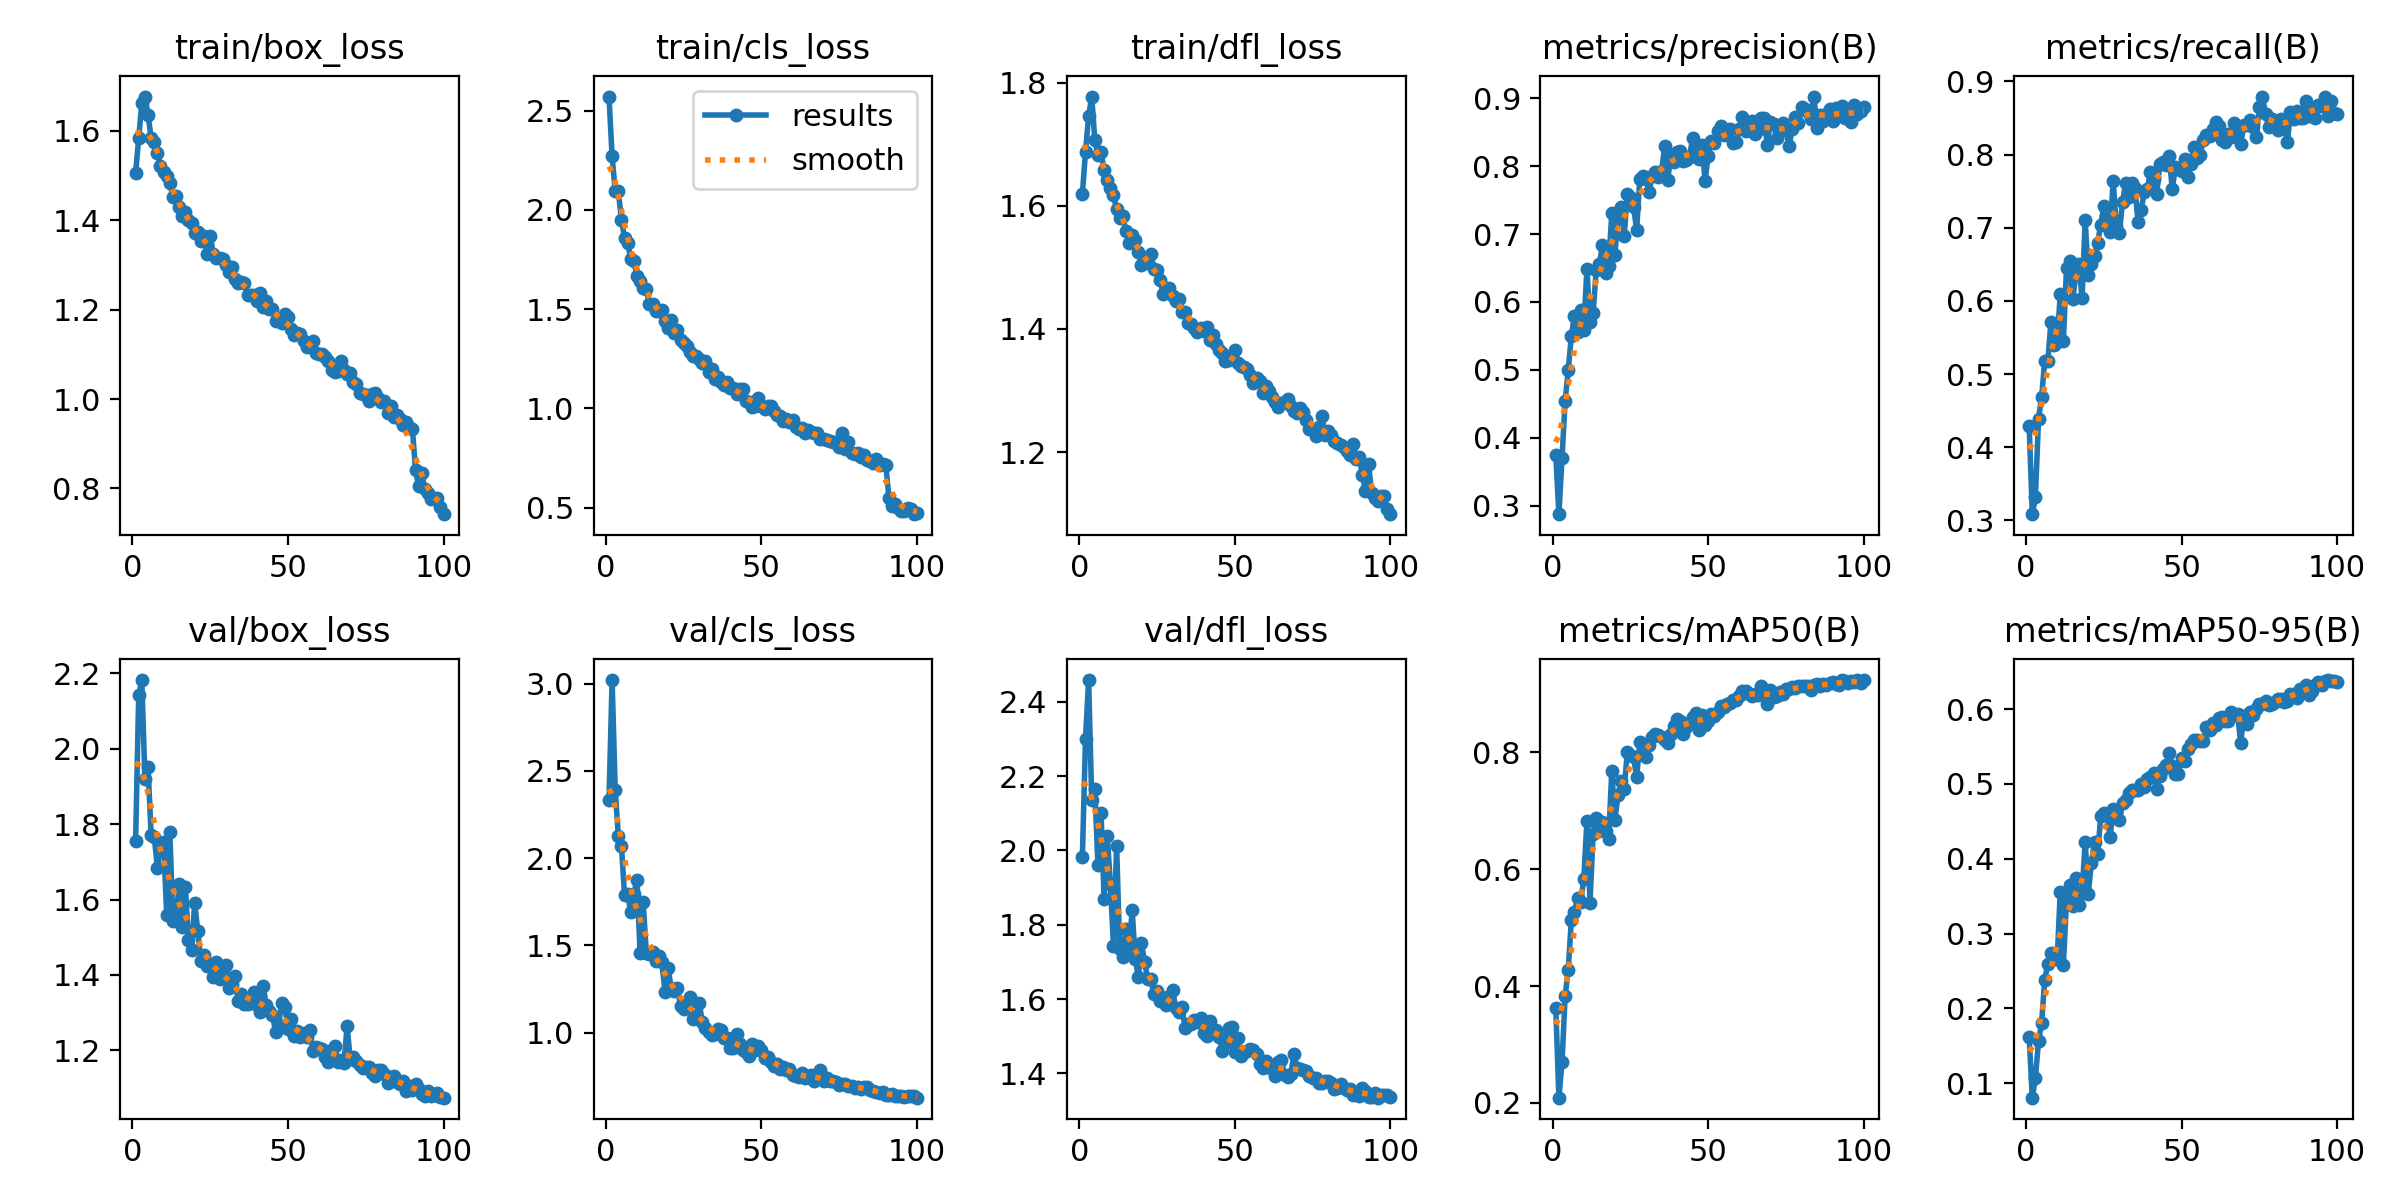

In [7]:
Image(filename=r'C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\train\results.png', width=600)

In [12]:
results = model.val(data=yaml_file)

Ultralytics 8.3.85  Python-3.12.8 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\BaiTap\Python\Violence_Detection\Yolo11\violence-detection-2\valid\labels.cache... 542 images, 71 backgrounds, 0 corrupt: 100%|██████████| 542/542 [00:00<?, ?it/s]

val: WARNING  C:\BaiTap\Python\Violence_Detection\Yolo11\violence-detection-2\valid\images\Capture-d-ecran-2024-05-15-184631_png.rf.4db2c872b624d79980886b907ecf1db2.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]


                   all        542        788      0.884      0.811      0.868      0.678
          non_violence        342        523      0.875      0.698      0.802      0.561
              violence        251        265      0.894      0.925      0.934      0.794
Speed: 0.6ms preprocess, 5.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train22


## Predict on test data (Images)

In [ ]:
results = model.predict(source=r'C:\BaiTap\Python\Violence_Detection\Yolo11\f', conf=0.25,save=True,show=True)

## Predict on folder images

In [6]:
import os
model = YOLO(r'C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\violence-detection-2(20k-img)(INCNoVio)\weights\best.pt')  

test_folder = r'C:\BaiTap\Python\Violence_Detection\Yolo11\f'

save_dir = os.path.join(os.path.dirname(test_folder), 'detect_results')
os.makedirs(save_dir, exist_ok=True)

# Lặp qua từng file trong thư mục
for filename in os.listdir(test_folder):
    # Chỉ xử lý các file ảnh
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        img_path = os.path.join(test_folder, filename)
        
        # Dự đoán với từng ảnh
        results = model.predict(
            source=img_path,
            conf=0.25,
            save=True,
            save_txt=True,  # Lưu file txt chứa bounding boxes
            save_conf=True,  # Lưu confidence scores trong file txt
            show=True,
            project=save_dir,  # Thư mục lưu kết quả
            name='exp',       # Tên thư mục con
            exist_ok=True     # Ghi đè nếu thư mục đã tồn tại
        )
        
        # Xử lý kết quả
        for result in results:
            print(f"\nKết quả cho ảnh: {filename}")
            print(f"Số vật thể phát hiện: {len(result.boxes)}")
            
            # Hiển thị thông tin chi tiết các detection
            for box in result.boxes:
                class_id = int(box.cls)
                confidence = float(box.conf)
                class_name = model.names[class_id]
                print(f"- {class_name} ({confidence:.2f})")
                
            # Lưu ảnh với annotations
            result.save(filename=os.path.join(save_dir, filename))
            
        # Hiển thị ảnh trong 3 giây (tuỳ chỉnh thời gian)
        if results[0].show():
            key = cv2.waitKey(3000)  # Hiển thị 3 giây
            if key == 27:  # Thoát nếu nhấn ESC
                break
            cv2.destroyAllWindows()

print(f"\nHoàn thành! Kết quả đã được lưu tại: {save_dir}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\BaiTap\\Python\\Violence_Detection\\Yolo11\\f'

## Predict on test data (Videos)


In [4]:
model = YOLO(r"C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\train\weights\best.pt")
results = model.predict(source=r'C:\BaiTap\Python\Violence_Detection\Yolo11\vidf.mp4', conf=0.4,save=True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1051) C:\BaiTap\Python\Violence_Detection\Yolo11\vidf.mp4: 384x640 (no detections), 73.2ms
video 1/1 (frame 2/1051) C:\BaiTap\Python\Violence_Detection\Yolo11\vidf.mp4: 384x640 (no detections), 13.2ms
video 1/1 (frame 3/1051) C:\BaiTap\Python\Violence_Detection\Yolo11\vidf.mp4: 384x640 (no detections), 12.7ms
video 1/1 (frame 4/1051) C:\BaiTap\Python\Violence_Detection\Yolo11\vidf.mp4: 384x640 (no detections), 12.0ms
video 1/1 (frame 5

## Predict on test folder data (Videos)

In [13]:
import os

# Load model đã trained
model = YOLO(r'C:\BaiTap\Python\Violence_Detection\Yolo11\runs\detect\train\weights\best.pt')  # Thay đổi đường dẫn model

# Thư mục chứa video cần test
video_folder = r'C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence'

# Thư mục lưu kết quả video
video_save_dir = os.path.join(video_folder, 'video_results')
os.makedirs(video_save_dir, exist_ok=True)

# Định dạng video hỗ trợ
video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv')

# Xử lý từng video
for vid_file in os.listdir(video_folder):
    if vid_file.lower().endswith(video_extensions):
        video_path = os.path.join(video_folder, vid_file)
        
        # Xử lý video không hiển thị
        results = model.predict(
            source=video_path,
            conf=0.6,
            save=True,
            save_txt=False,      # Tắt lưu txt cho video
            show=False,          # Không hiển thị cửa sổ
            show_labels=True,    # Vẫn giữ nhãn khi lưu
            show_conf=True,      # Vẫn giữ confidence khi lưu
            project=video_save_dir,
            name=os.path.splitext(vid_file)[0],  # Tạo thư mục riêng cho từng video
            exist_ok=True,
            stream=True          # Xử lý video theo chế độ stream để tiết kiệm RAM
        )
        
        # Xử lý kết quả (tuỳ chọn)
        processed_frames = 0
        for result in results:
            processed_frames += 1
            # Có thể thêm xử lý custom ở đây
            
        print(f'Đã xử lý xong {vid_file} - {processed_frames} frames')

print(f'\nKết quả video đã được lưu tại: {video_save_dir}')


video 1/1 (frame 1/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 13.2ms
video 1/1 (frame 2/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 12.3ms
video 1/1 (frame 3/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 16.4ms
video 1/1 (frame 4/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 12.2ms
video 1/1 (frame 5/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 12.8ms
video 1/1 (frame 6/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 12.0ms
video 1/1 (frame 7/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 19.5ms
video 1/1 (frame 8/66) C:\BaiTap\Python\Violence_Detection\Yolo11\data\NonViolence\NV_1.mp4: 384x640 1 NonViolence, 11.7ms
video 1/1 (fram

KeyboardInterrupt: 